In [1]:
import pandas as pd
import random
import string

num_rows = 10000
# Function to generate a unique Lead ID
def generate_lead_id(index):
    return (f"LD{index+1}")

# Sample data
locations = ["Ahmedabad", "Surat", "Mumbai", "Delhi", "Bangalore", "Hyderabad", "Chennai"]
colleges = ["XYZ University", "ABC Institute", "PQR College", "LMN Academy", "OPQ University"]
years_of_study = ["1st", "2nd", "3rd", "4th"]
program_interests = ["Data Science", "Robotics", "AI", "Electric Vehicle"]
lead_sources = ["Instagram", "LinkedIn", "College Collaboration", "Google Form", "Mass-Mailing", "Whatsapp"]

# Generate the dataset
data = {
    "Lead ID": [generate_lead_id(i) for i in range(num_rows)],
    "Location": [random.choice(locations) for _ in range(num_rows)],
    "College": [random.choice(colleges) for _ in range(num_rows)],
    "Year of Study": [random.choice(years_of_study) for _ in range(num_rows)],
    "Program Interest": [random.choice(program_interests) for _ in range(num_rows)],
    "Lead Source": [random.choice(lead_sources) for _ in range(num_rows)]
}

df = pd.DataFrame(data)

df.to_csv("hypothetical_dataset.csv", index=False)

print("Dataset created and saved as 'hypothetical_dataset.csv'.")


Dataset created and saved as 'hypothetical_dataset.csv'.


In [2]:
#Firstly to analyze the data we neeed to have clean data and we have to handle te missing value
df=pd.read_csv("hypothetical_dataset.csv")
df.info()
df=df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Lead ID           10000 non-null  object
 1   Location          10000 non-null  object
 2   College           10000 non-null  object
 3   Year of Study     10000 non-null  object
 4   Program Interest  10000 non-null  object
 5   Lead Source       10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


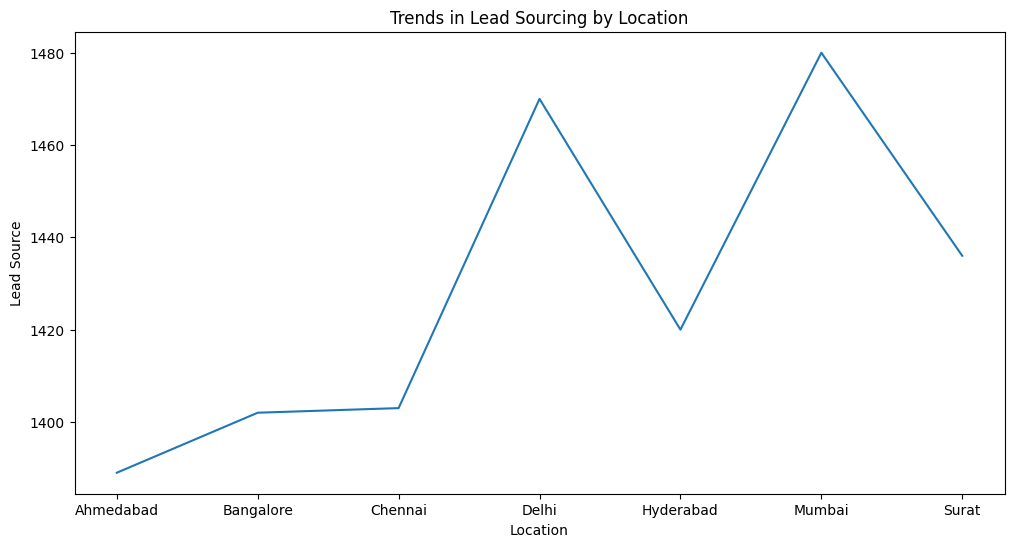

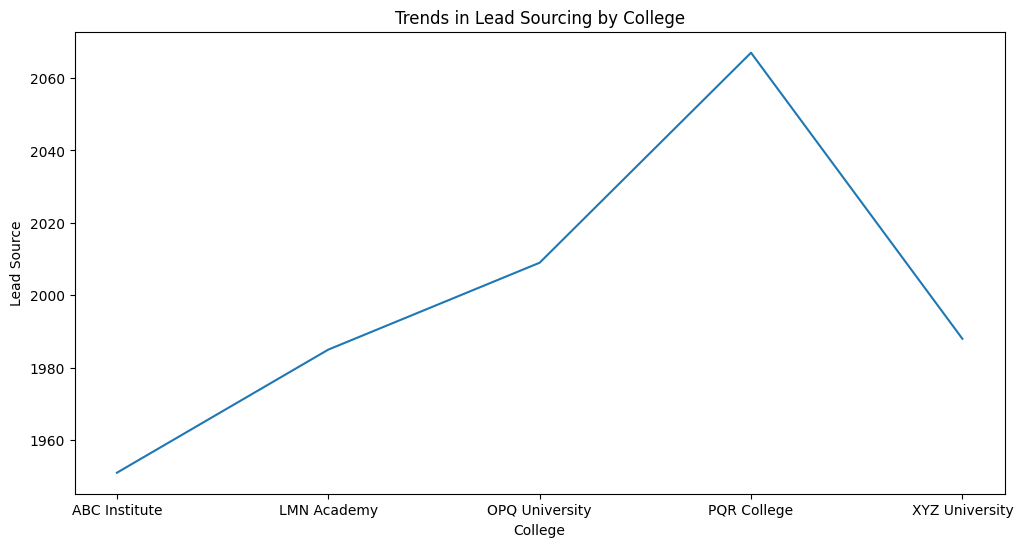

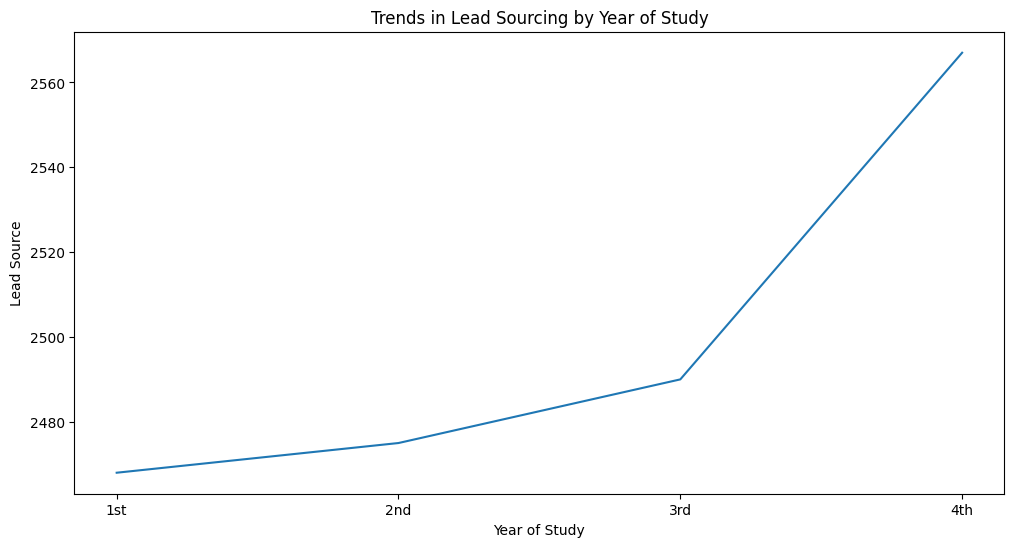

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

location_trends = df.groupby('Location')['Lead Source'].count()
college_trends = df.groupby('College')['Lead Source'].count()
year_trends = df.groupby('Year of Study')['Lead Source'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(data=location_trends)
plt.title('Trends in Lead Sourcing by Location')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=college_trends)
plt.title('Trends in Lead Sourcing by College')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_trends)
plt.title('Trends in Lead Sourcing by Year of Study')
plt.show()

In [4]:
# Highlight anomalies
#from scipy.stats import zscore
#df['zscore'] = zscore(df['Lead Source'])
#anomalies = df[df['zscore'].abs() > 3]  # Threshold for anomalies
#print(anomalies)

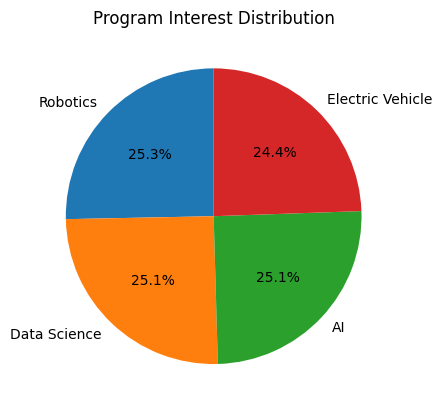

In [5]:
#Progarm Analysis : By comparing the intrest level of students in different field and to know that i have used pie chart
import pandas as pd
import matplotlib.pyplot as plt
category_counts = df['Program Interest'].value_counts()
plt.pie(category_counts,labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Program Interest Distribution')
plt.show()



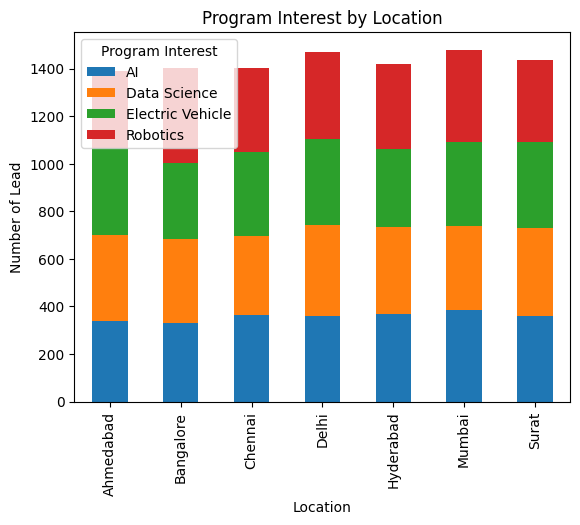

In [6]:
# To Provide recommendation on which demographics should be targeted more aggressively for each program.
#Firstly we need to find trend between location and progarms so for that we need to plot a stacked bar chart

import matplotlib.pyplot as plt

# Group by both 'Location' and 'Program Interest' and count the occurrences
location_program_counts = df.groupby(['Location', 'Program Interest']).size().unstack()
location_program_counts.plot(kind='bar', stacked=True)

plt.title('Program Interest by Location')
plt.ylabel('Number of Lead')
plt.xlabel('Location')
plt.legend(title='Program Interest')
plt.show()


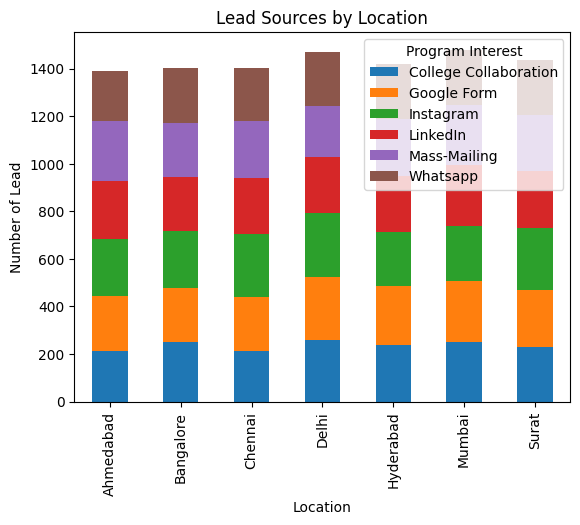

In [7]:
#To make a data-driven projection about lead conversion rates and suggest a budget allocation strategy for marketing and targeting
#We would first need to review the lead source conversion rates across different locations
#Which would help us to know which source has to spend more money in which location
#And for that we need to plot stacked bar chart for location and lead source

Location_Lead=df.groupby(['Location','Lead Source']).size().unstack()
Location_Lead.plot(kind='bar',stacked=True)
plt.title('Lead Sources by Location')
plt.ylabel('Number of Lead')
plt.xlabel('Location')
plt.legend(title='Program Interest')
plt.show()